<a href="https://colab.research.google.com/github/mostafadentist/python-ipynb/blob/main/Next_Generation_Sequencing_(NGS)_Data_Analysis_Toy_Examples_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
from Bio import SeqIO

# Example FASTQ (fixed: 17 bases, 17 quality scores)
with open("example.fastq", "w") as f:
    f.write("@SEQ_ID\n")
    f.write("GATTTGGGGTTTAAAGG\n")   # 17 bases
    f.write("+\n")
    f.write("IIIIIIIIIIIIIIIII\n")   # 17 quality chars (all high quality)

# Read FASTQ
for record in SeqIO.parse("example.fastq", "fastq"):
    print("ID:", record.id)
    print("Sequence:", record.seq)
    print("Quality:", record.letter_annotations["phred_quality"])

ID: SEQ_ID
Sequence: GATTTGGGGTTTAAAGG
Quality: [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]


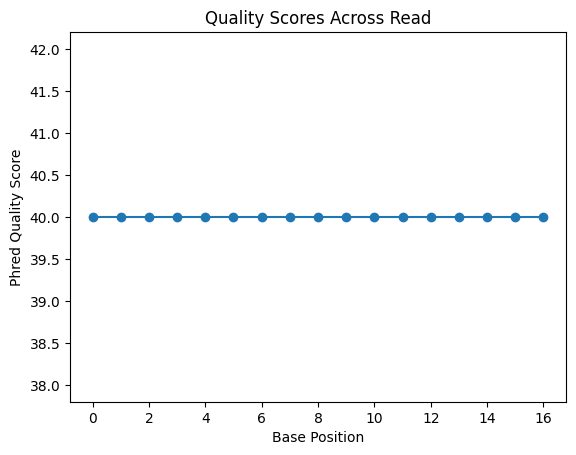

In [101]:
import matplotlib.pyplot as plt

qualities = record.letter_annotations["phred_quality"]
plt.plot(qualities, marker="o")
plt.title("Quality Scores Across Read")
plt.xlabel("Base Position")
plt.ylabel("Phred Quality Score")
plt.show()

In [102]:
def trim_quality(seq, qual, threshold=20):
    # Trim from right until all bases ≥ threshold
    while qual and qual[-1] < threshold:
        seq = seq[:-1]
        qual = qual[:-1]
    return seq, qual

seq, qual = trim_quality(str(record.seq), qualities, 20)
print("Trimmed Sequence:", seq)
print("Trimmed Qualities:", qual)

Trimmed Sequence: GATTTGGGGTTTAAAGG
Trimmed Qualities: [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]


In [103]:
reference = "ATGCGTACGTAGCTAGCTAGCGTACGATCG"
read = "GTAGCTAGC"

pos = reference.find(read)
if pos != -1:
    print(f"Read maps to position {pos}-{pos+len(read)} in reference")
else:
    print("Read not found in reference")

Read maps to position 8-17 in reference


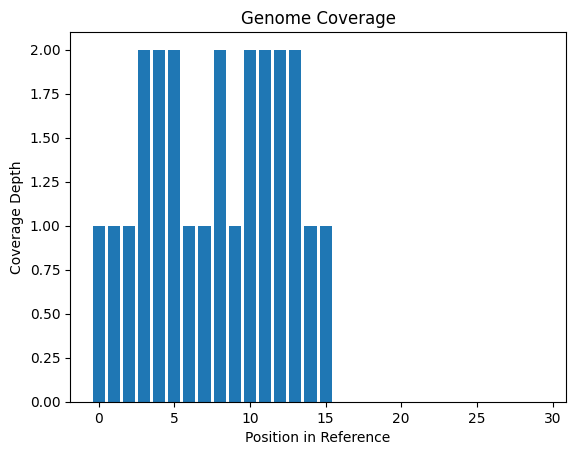

In [104]:
ref_len = len(reference)
coverage = [0]*ref_len

reads = ["ATGCGT", "CGTACG", "GTAGCT", "AGCTAG"]
for r in reads:
    pos = reference.find(r)
    if pos != -1:
        for i in range(pos, pos+len(r)):
            coverage[i] += 1

plt.bar(range(ref_len), coverage)
plt.title("Genome Coverage")
plt.xlabel("Position in Reference")
plt.ylabel("Coverage Depth")
plt.show()

In [105]:
ref = "ATGCGTACGTAG"
read = "ATGCGTTCGTAG"  # mutation at position 6

for i,(r,b) in enumerate(zip(ref, read)):
    if r != b:
        print(f"Variant at position {i}: {r} -> {b}")

Variant at position 6: A -> T
